# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st 
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")

City Name: katsuura, City ID: 2112309
City Name: hilo, City ID: 5855927
City Name: manzhouli, City ID: 2035836
City Name: east london, City ID: 1006984
City Name: ankazobe, City ID: 1072849
City Name: mataura, City ID: 6201424
City Name: tuy hoa, City ID: 1563281
City Name: port hardy, City ID: 6111862
That record does not exist, searching for next record...
City Name: rikitea, City ID: 4030556
City Name: busselton, City ID: 2075265
City Name: bluff, City ID: 2206939
City Name: elizabeth city, City ID: 4465088
City Name: torbay, City ID: 6167817
City Name: tukrah, City ID: 88834
City Name: albany, City ID: 5106841
City Name: avarua, City ID: 4035715
That record does not exist, searching for next record...
City Name: marsa matruh, City ID: 352733
City Name: chicama, City ID: 3698359
City Name: lompoc, City ID: 5367788
That record does not exist, searching for next record...
City Name: katherine, City ID: 2068655
City Name: bartica, City ID: 3379507
City Name: mugur-aksy, City ID: 149828

City Name: fortuna, City ID: 5563839
City Name: mahibadhoo, City ID: 1337605
City Name: bilma, City ID: 2446796
City Name: killybegs, City ID: 2963295
City Name: sao geraldo do araguaia, City ID: 3388760
City Name: bengkulu, City ID: 1649150
City Name: eureka, City ID: 5563397
City Name: winnemucca, City ID: 5710360
City Name: durango, City ID: 4011741
That record does not exist, searching for next record...
That record does not exist, searching for next record...
City Name: sorland, City ID: 3137469
City Name: mehamn, City ID: 778707
City Name: coihaique, City ID: 3894426
City Name: pouebo, City ID: 2138607
City Name: huarmey, City ID: 3939168
City Name: mbaiki, City ID: 2384770
City Name: necochea, City ID: 3430443
City Name: lukovetskiy, City ID: 533418
City Name: shanghai, City ID: 1796236
City Name: yuncheng, City ID: 1785738
City Name: kruisfontein, City ID: 986717
That record does not exist, searching for next record...
City Name: port keats, City ID: 2063039
City Name: kudahuva

City Name: kahului, City ID: 5847411
City Name: san francisco, City ID: 5391959
City Name: turukhansk, City ID: 1488903
City Name: altay, City ID: 1529651
City Name: deep river, City ID: 5937073
City Name: mafinga, City ID: 155405
City Name: sangar, City ID: 2017215
City Name: quatre cocos, City ID: 1106643
City Name: tarumovka, City ID: 484290
City Name: tautira, City ID: 4033557
City Name: mount isa, City ID: 2065594
City Name: naze, City ID: 1855540
City Name: sumbe, City ID: 3346015
That record does not exist, searching for next record...
City Name: peskovka, City ID: 510473
City Name: saint-augustin, City ID: 6137462
City Name: opuwo, City ID: 3354077
City Name: alofi, City ID: 4036284
City Name: atherton, City ID: 2656847
City Name: conceicao do araguaia, City ID: 3401845
City Name: trincomalee, City ID: 1226260
City Name: vao, City ID: 2137773
City Name: pangai, City ID: 4032369
City Name: ahipara, City ID: 2194098
City Name: mahendranagar, City ID: 1283095
City Name: diego de a

City Name: rakaia, City ID: 2183824
City Name: wilmington, City ID: 4499379
City Name: zavyalovo, City ID: 1505506
City Name: scarborough, City ID: 2638419
That record does not exist, searching for next record...
City Name: panguna, City ID: 2088659
City Name: lichinga, City ID: 1043893
City Name: le vauclin, City ID: 3570392


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, 
                          "City": city_name_list,"Lat": lat_list, 
                          "Lng": lng_list,
                          "Temperature": temp_list, 
                          "Humidity": humidity_list, 
                          "Clouds": clouds_list,
                          "Wind Speed": wind_speed_list,
                          "Country": country_list})
cities_df.head()

,City ID,City,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed,Country
0,2112309,Katsuura,35.1333,140.3000,58.86,82,20,9.22,JP
1,5855927,Hilo,19.7297,-155.0900,74.95,65,90,6.91,US
2,2035836,Manzhouli,49.6000,117.4333,32.94,76,16,6.46,CN
3,1006984,East London,-33.0153,27.9116,57.20,82,0,6.91,ZA
4,1072849,Ankazobe,-18.3167,47.1167,64.40,88,40,3.44,MG


In [8]:

# Export to .csv file
cities_df.to_csv("../output_data/city_weather.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

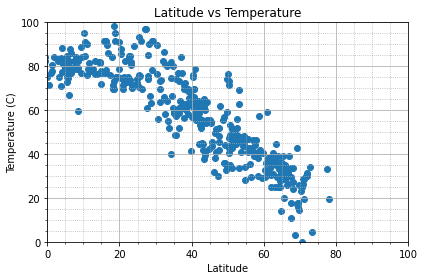

<Figure size 432x288 with 0 Axes>

In [16]:
x_val = cities_df["Lat"]
y_val = cities_df["Temperature"]

plt.scatter(x_val,y_val)
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../Images/lat_temp.png")



In [17]:
#Lat vs Temp: This plot shows a relationship between latitude & temperature. 
#The closer you are to lalitude 0 the hotter the temperture gets.

## Latitude vs. Humidity Plot

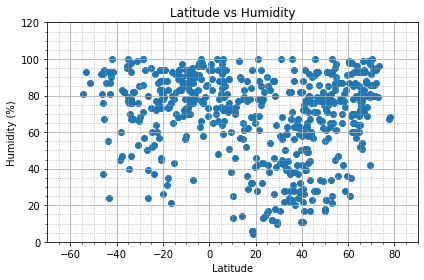

<Figure size 432x288 with 0 Axes>

In [18]:
x_val = cities_df["Lat"]
y_val = cities_df["Humidity"]

plt.scatter(x_val,y_val)
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0,120)
plt.xlim(-70, 90)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../Images/lat_humid.png")

In [19]:
#Not a corralation between latitude and humidity 

## Latitude vs. Cloudiness Plot

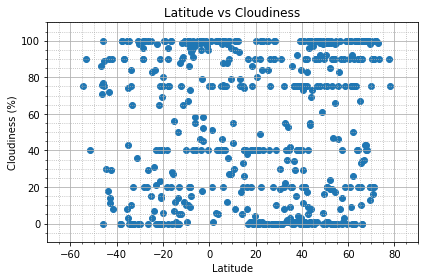

<Figure size 432x288 with 0 Axes>

In [20]:
x_val = cities_df["Lat"]
y_val = cities_df["Clouds"]

plt.scatter(x_val,y_val)
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-10, 110)
plt.xlim(-70, 90)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../Images/lat_clouds.png")

In [21]:
#Not a correlation between latitude and cloudiness

## Latitude vs. Wind Speed Plot

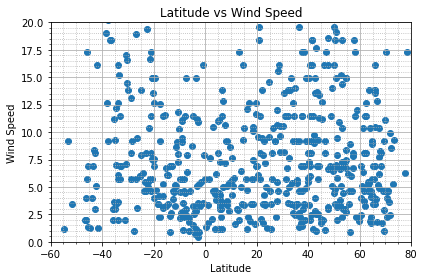

<Figure size 432x288 with 0 Axes>

In [22]:
x_val = cities_df["Lat"]
y_val = cities_df["Wind Speed"]

plt.scatter(x_val,y_val)
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(0, 20)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../Images/lat_wind.png")


In [23]:
#The less closer you are to 0 latitude the fastest wind speed will be 

## Linear Regression

In [24]:
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

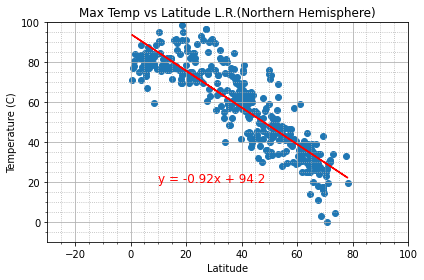

<Figure size 432x288 with 0 Axes>

In [29]:
x_val = northern_hemisphere["Lat"]
y_val = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_val, y_val)

plt.scatter(x_val,y_val)
plt.title('Max Temp vs Latitude L.R.(Northern Hemisphere)')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.ylim(-10,100)
plt.xlim(-30, 100)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../Images/nh_maxtemp_vs_lat_regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

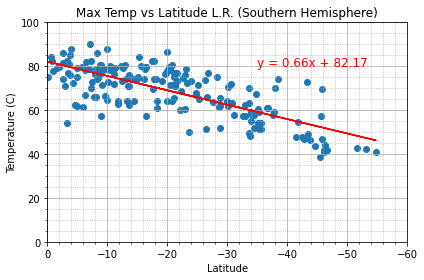

<Figure size 432x288 with 0 Axes>

In [31]:

x_val = southern_hemisphere["Lat"]
y_val = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_val, y_val)

plt.scatter(x_val,y_val)
plt.title('Max Temp vs Latitude L.R. (Southern Hemisphere)')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.ylim(0,100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../Images/sh_maxtemp_lat_regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

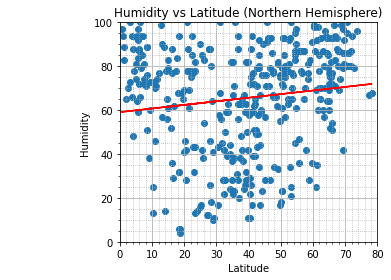

<Figure size 432x288 with 0 Axes>

In [32]:

x_val = northern_hemisphere["Lat"]
y_val = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_val, y_val)

plt.scatter(x_val,y_val)
plt.title('Humidity vs Latitude (Northern Hemisphere)')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(0,100)
plt.xlim(0,80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../Images/nh_hum_vs_lat_regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

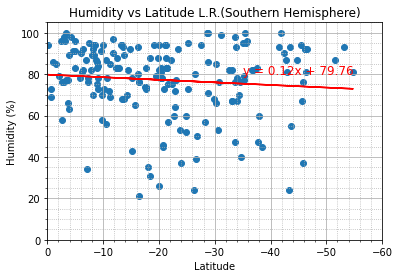

<Figure size 432x288 with 0 Axes>

In [34]:
x_val = southern_hemisphere["Lat"]
y_val = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_val, y_val)

plt.scatter(x_val,y_val)
plt.title('Humidity vs Latitude L.R.(Southern Hemisphere)')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("../Images/sh_hum_vs_lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

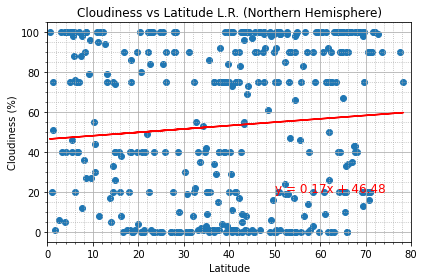

<Figure size 432x288 with 0 Axes>

In [35]:
x_val = northern_hemisphere["Lat"]
y_val = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_val, y_val)

plt.scatter(x_val,y_val)
plt.title('Cloudiness vs Latitude L.R. (Northern Hemisphere)')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../Images/nh_cloud_vs_lat_regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

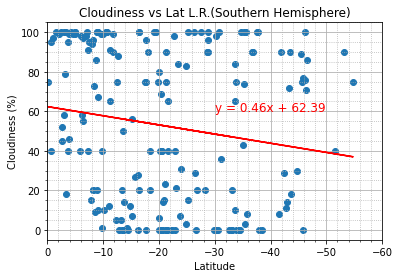

<Figure size 432x288 with 0 Axes>

In [36]:
x_val = southern_hemisphere["Lat"]
y_val = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_val, y_val)

plt.scatter(x_val,y_val)
plt.title('Cloudiness vs Lat L.R.(Southern Hemisphere)')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("../Images/sh_cloud_vs_lat_regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

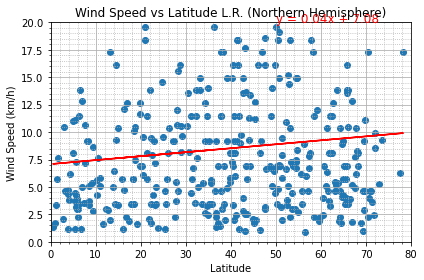

<Figure size 432x288 with 0 Axes>

In [37]:
x_val = northern_hemisphere["Lat"]
y_val = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_val, y_val)

plt.scatter(x_val,y_val)
plt.title('Wind Speed vs Latitude L.R. (Northern Hemisphere)')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.ylim(0, 20)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("../Images/nh_wind_vs_lat_regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

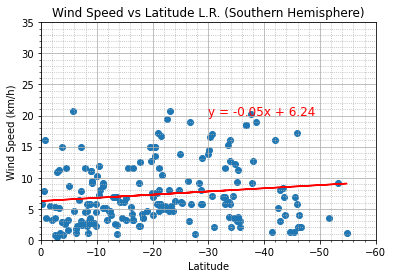

<Figure size 432x288 with 0 Axes>

In [41]:
x_val = southern_hemisphere["Lat"]
y_val = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_val, y_val)

plt.scatter(x_val,y_val)
plt.title('Wind Speed vs Latitude L.R. (Southern Hemisphere)')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("../Images/sh_wind_vs_lat_regression.png")